# Project 3: Exploring Numerical Taylor Series Approximations

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 90px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px"\>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px"\>
</h1>
<h2 style="height: 25px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.5, Friday, Oct 6, 2023. This assignment will be combined with next week's assignment for submission.*

## Overview:

Taylor series approximations are fundamental in numerical methods as it is the basis of many key aspects in numerical (finite) modelling. It is important to understand the relationship that Taylor series has for a given range of the function it is approximating. In the majority of cases, we use Taylor as an approximation of non-linear functions that do not have mathematically simple solutions and instead we use a polynomial to locally approximate. However, it is cruicial to understand that the result is only accurate over a small interval. Part of what we will look at in this project is concerning this interval. 

The Taylor series becomes a key factor in finite difference and finite element models for approximating integrals, derivatives and in representing physical systems in computational models, which can help break down complex mathematical expressions into more computational efficient models. 

For this project, we will look at a simple function that we can solve analytically and compare our Taylor approximations. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress= True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b> Derive the Taylor series expansion terms.

<u>On paper</u>, derive the **first four** terms of the Taylor series for the expression
$$
f(x)= 2\cos(x)+\sin(x) 
$$ 

expanded about the point $x=\pi$.

We will use these terms and investigate the effects of carrying more or less terms in the approximation and then assess the numerical effects of altering the step-size in the descretization.

Use the following markdown cell to include your deriviation of the Taylor series terms.

</ol>
</p>
</div>

The Taylor series expansion of an arbitrary function $f(x)$ around $x=\pi$ is given by

$$f(x) = \sum_{i=0}^\infty\frac{f^{(i)}(a)}{i!}(x-a)^i = f(a) + f'(a)(x-a)+\frac{f''(a)}{2!}(x-a)^2+\frac{f^{(3)}(a)}{3!}(x-a)^3 + \mathcal{O}((x-a)^4)$$

In our case the Taylor function: $$f(\pi) \approx 2cos(\pi) + sin(\pi) + (-2sin(\pi) + cos(\pi))(x-\pi)+\frac{(-2cos(\pi) - sin(\pi))}{2!}(x-\pi)^2+\frac{(2sin(\pi) - cos(\pi))}{3!}(x-\pi)^3 + \frac{(2cos(\pi) + sin(\pi))}{4!}(x-\pi)^4 $$

## Taylor Series Definition

Recall that the Taylor series for one variable as previously described in the fundamentals section of the MUDE textbook as
$$ f(x)\approx f(x_0)+\frac{\partial}{\partial x}f(x_0)(x-x_0)+\frac{1}{2!}\frac{\partial^2}{\partial x^2}f(x_0)(x-x_0)^2+...+\frac{1}{n!}\frac{\partial^n}{\partial x^n}f(x_0)(x-x_0)^n $$
This may also be written as a summation, which may help to visualize the process of writing the terms of the Taylor approximation. The Taylor approximation as a summation becomes 
$$ f(x) \approx \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!}(x-x_0)^{n}$$

where $f^{(n)}(x_0)$ indicates the $n$-th derivative of a function $f(x)$ evaluated at $x=x_0$.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2:</b> Plotting reference expression and approximations.

Make a plot of the expression $f(x)=2\cos(x)+\sin(x)$ that we will use as a reference. We will want to produce plots that will include each successive term of the Taylor approximation to see how the approximation improves as we include more terms in the Taylor series. Keep in mind that we have expanded the series about the point $x=\pi$. 

</p>
</div>


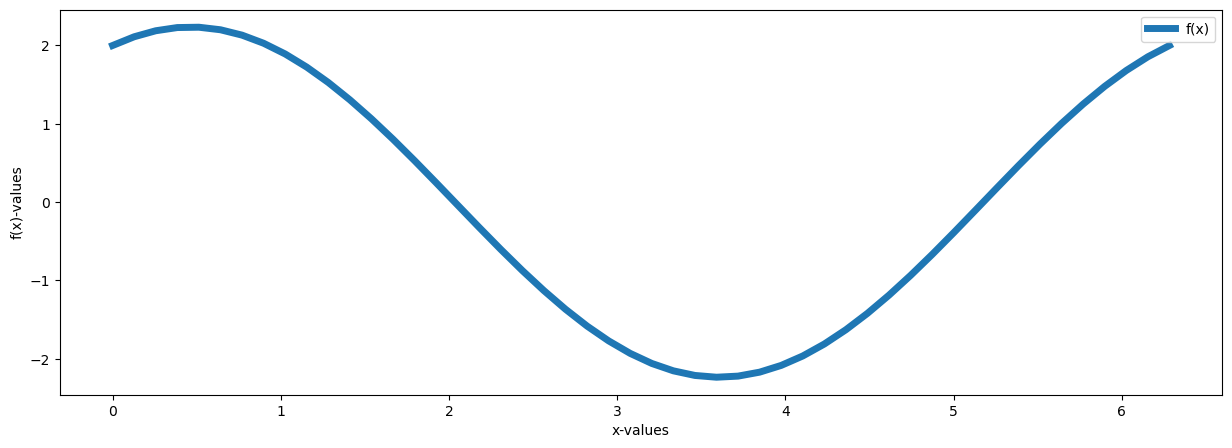

In [2]:
def f_x(x):
    return 2 * np.cos(x) + np.sin(x)

x = np.linspace(0, 2 * np.pi)

plt.figure(figsize=(15,5))
plt.plot(x, f_x(x), lw=5, label='f(x)')
plt.xlabel('x-values')
plt.ylabel('f(x)-values')
plt.legend()


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.3:</b> Putting pen to python.

Using your first four terms of the Taylor approximation, enter the terms in the following cell so that we can use them in our approximation of the expression given above. We will use the solution to the above approximation to begin the process of seeing the plotting the approximations along with the analytical representation of the equation. This is to give us an indication of how the number of terms affect our approximation of a function. 

In the code cell below, `f_#` refers to the **derivatives** of each portion of the function, and the `taylor_#` the order of the Taylor approximation. The folowing cell should contain four defined functions for the orders.

</p>
</div>


In [3]:
#Use the following 'def' statements to add your derivatives of f(x)
def f_1(x):
    return (-2 * np.sin(x) + np.cos(x)) * (x - np.pi)

def f_2(x):
    return (-2 * np.cos(x) - np.sin(x)) * (x - np.pi) / 2

def f_3(x):
    return (2 * np.sin(x) - np.cos(x)) * (x - np.pi)**3 / 6

def f_4(x):
    return (2 * np.cos(x) + np.sin(x)) * (x- np.pi)**4 / 24



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.4:</b> Put together your Taylor terms. 

In the following cell, assemble the first four orders of the Taylor approximations terms that you derived above.

</p>
</div>


In [4]:
X = np.linspace(np.pi - 0.5,  np.pi + 1)

taylor_1 = f_x(X) + f_1(X)
taylor_2 = f_x(X) + f_1(X) + f_2(X)
taylor_3 = f_x(X) + f_1(X) + f_2(X) + f_3(X)
taylor_4 = f_x(X) + f_1(X) + f_2(X) + f_3(X) + f_4(X)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.5:</b> Plot your function along with your Taylor orders to illustrate the local approximations of the inclusions of each extra term. The plot should clearly illustrate how each of your order approximations relate to the original function.

</p>
</div>


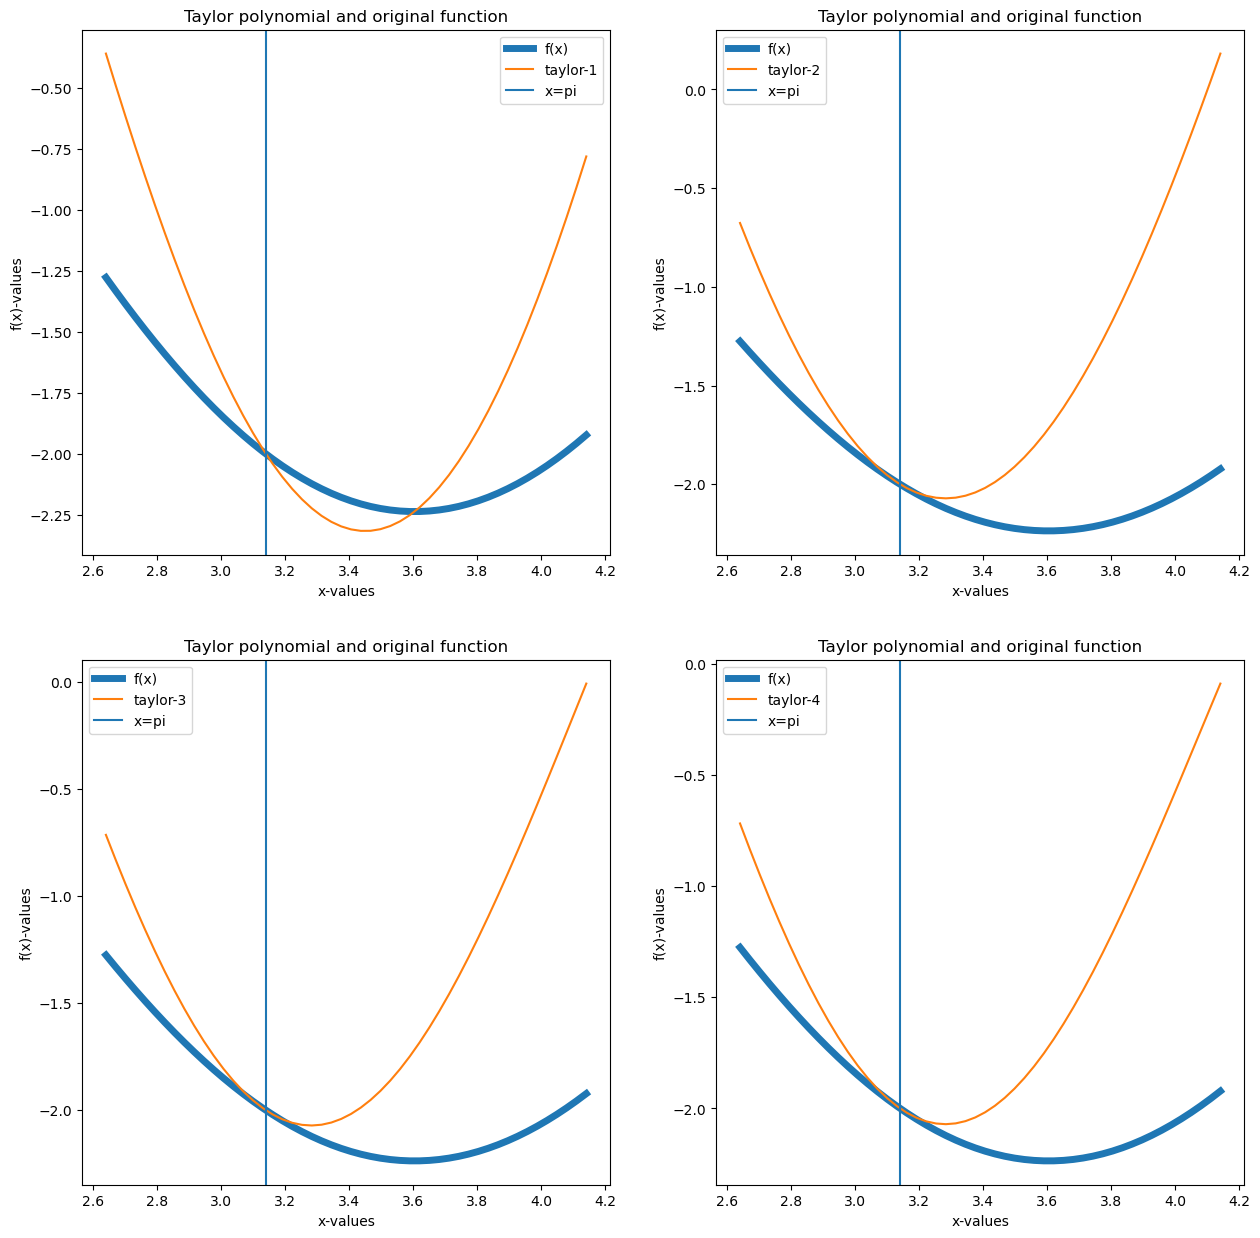

In [5]:
# Provide your code here
taylor_list = [taylor_1, taylor_2, taylor_3, taylor_4]
plt.figure(figsize=(15,15))


for i in range(len(taylor_list)):
    plt.subplot(2, 2, i + 1)
    plt.plot(X, f_x(X), lw=5, label='f(x)')
    plt.plot(X, taylor_list[i], label=f'taylor-{i+1}')
    plt.axvline(np.pi, label='x=pi')
    plt.xlabel('x-values')
    plt.ylabel('f(x)-values')
    plt.legend()
    plt.title("Taylor polynomial and original function")

## Truncation error

When we use Taylor series approximations of a function, because we truncate the infinite series to a specfic number of terms, we inherently introduce error. For the case here, because we are starting from an analytical function, we can really compare the various approximations based on the number of terms we use from the Taylor series.   

For this analysis, let's determine the absolute error by comparing the analytical solution to the numerical approximation of our function. This can be found by taking the absolute value of the difference between the function and the approximation, namely
$$
\Delta f(x)=|f(x)-T_n|
$$
where $T_n$ refers to the number of terms (or derivatives) of the Taylor series we use.

This error is directly related to the fact that, in a Taylor series approximation, we are not taking the full infinite series (in our case, just the first few terms). By truncating the series, we are not getting a good approximation of the function everywhere, but instead focused on a specific portion at the point from which we expand the series (in our case at $x=\pi$). 

In practise, we generally don't know the analytical solution as we do here, and so we must also consider and understand the behaviour of the truncation error based on our knowledge of the remaining terms that we do not use from the Taylor series. We generally talk about this in terms of the order of the truncation, referring to the function derivative in which we have truncated the series.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p><b>Task 2.1:</b> Truncation Error Determination and Plot

Use your Taylor terms above to determine the absolute error for each of our Taylor series approximations for the inclusion of one to four terms. Plot these approximations, to demonstrate the errors due to each order approximation. Use the following code cell to calculate the error and plot the result.
</p>
</div>

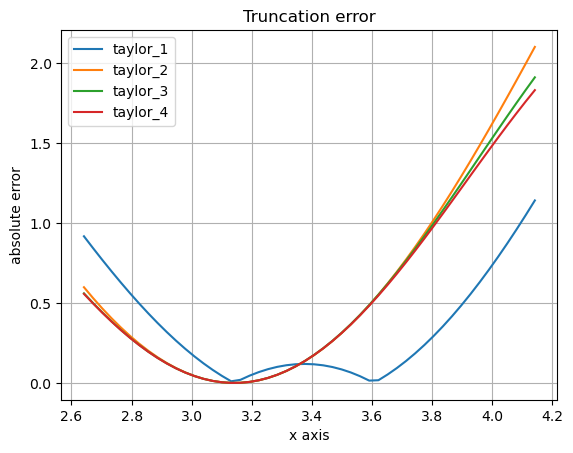

In [6]:
def TERROR(x, y):
    return abs(x - y)


for i in range(len(taylor_list)):
    plt.plot(X, TERROR(f_x(X), taylor_list[i]), label = f'taylor_{i+1}')
    plt.legend()

plt.ylabel('absolute error')
plt.xlabel('x axis')
plt.title('Truncation error' )
plt.grid()

## Percent Error

It could also be useful to think about this error in terms of the percent error of the approximation. 

In this case we can calculate the percentage difference between the analytical function and the approximation by simply 
$$
\textrm{Percent Error}=\frac{∣f(x)−T_n(x)∣}{∣f(x)∣}\times 100 \% 
$$





<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p><b>Task 2.2:</b> Percent Error Plot
    
Calculate the percent error between the analytical and the first four Taylor order approximations of the function. Produce a meaningful plot that demonstrates the percent error. 

</p>
</div>

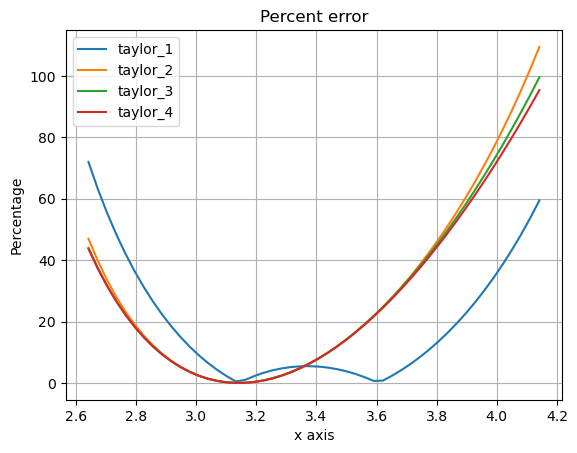

In [7]:
def PERROR(f_x, taylor):
    return np.abs(f_x - taylor) / np.abs(f_x) * 100

for i in range(len(taylor_list)):
    plt.plot(X, PERROR(f_x(X), taylor_list[i]), label = f'taylor_{i+1}')
    plt.legend()

plt.ylabel('Percentage')
plt.xlabel('x axis')
plt.title('Percent error')
plt.grid()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b> Interpretation of result. 

Judging by your absolute error and percent error between the function $f(x)$ and your approximations, over what range would you say your approximation the Taylor series is in good estimation of for each order? Provide some justification in the following markdown cell and try to use some quantitative reasonings from your plots.

</p>
</div>

**Answer to task 3:**
We notice that there is a decrease in the absolute error and percent error as the order of the taylor polynomial increases. There is around 25% improvement in the accuracy of the approximation between the 1st order and the rest of the taylor polynomials while there is only 2-3% improvement between the 2nd and the 3rd/4th ones. The last two approximations practically overlap in the range that we have chosen.

We now provide the ranges of the taylor approximations over which we think they are good enough:

**1st order** Taylor polynomial -> when 3.00 < x < 3.7 yields a 10% error

**2nd order** Taylor polynomial -> when 2.60 < x < 3.5 yields a 10% error

**3rd order** Taylor polynomial -> when 2.60 < x < 3.5 yields a 10% error  

## Taylor Series Expansion in Two Variables

Let's investigate how the Taylor expansion approximation changes as we include more variables and start structuring how we can produce the approximation and plot the results. It's important to recognize when it is a good idea to include more terms and that we can understand the effects of more variables and the number of terms required to make a good approximation.

Expanding a function of two variables, $f(x, y)$, using a Taylor series is an extension of the one-variable Taylor series expansion. The Taylor expansion for a function of two-variables can be expressed as:

$$
f(x, y) \approx f(a, b) + \frac{\partial f}{\partial x}\bigg|_{(a, b)}(x - a)  + \frac{\partial f}{\partial y}\bigg|_{(a, b)}(y - b) \\ 
+ \frac{1}{2!}\frac{\partial^2 f}{\partial x^2}\bigg|_{(a, b)}(x - a)^2 + \frac{1}{2!}\frac{\partial^2 f}{\partial y^2}\bigg|_{(a, b)}(y - b)^2 \\
+ \frac{\partial^2 f}{\partial x \partial y}\bigg|_{(a, b)}(x - a)(y - b) + \ldots
$$

Or, as a summation

$$
f(x,y)\approx \sum_{i=0}^n \sum_{j=0}^{n - i} \frac{1}{i!j!}\frac{\partial^{(i+j)}f}{\partial x^i \partial y^{j}}(x_0,y_0)(x-x_0)^i(y-y_0)^j 
$$

The terms in this summation are determined by the partial derivatives of $f$ with respect to $x$ and $y$ evaluated at $(x_0, y_0)$. The expansion includes an infinite series of terms, starting from the first-order terms and continuing to higher-order terms as $n$ increases. The choice of how many terms to include in the expansion depends on the desired level of accuracy.


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.1:</b> Writing out the expansion. 

Using the function $f(x,y)=\sin(2x)+\cos(y)$ derive the first <b>two</b> terms of the approximation. Solve out the first two terms of the Taylor expansion of two variables <u>on paper</u>, as before. Use the following cell to include your workings for the solution. 
</ol>
</p>
</div>
 


The taylor series of 2 terms for a function with 2 variables is as follows:
$$
\begin{align*}
f(x, y) \approx f(a, b) &+ \frac{\partial f}{\partial x}(a, b)(x - a) + \frac{\partial f}{\partial y}(a, b)(y - b)\\
& + \frac{1}{2!}\left(\frac{\partial^2 f}{\partial x^2}(a, b)(x - a)^2 + 2\frac{\partial^2 f}{\partial x \partial y}(a, b)(x - a)(y - b) + \frac{\partial^2 f}{\partial y^2}(a, b)(y - b)^2\right) \\
\end{align*}
$$

Where: 
$$f(x, y) = sin(2x)+cos(y)$$
$$\frac{\partial f}{\partial x} = 2 cos(2x)$$
$$\frac{\partial f}{\partial y} = -sin(y)$$
$$\frac{\partial^2 f}{\partial x^2}=-4 sin(2x)$$
$$\frac{\partial^2 f}{\partial x \partial y} = 0$$
$$\frac{\partial^2 f}{\partial y^2} = -cos(y)$$

From this follows the taylor series for our function:

$$f(x,y) \approx sin(2a)+cos(b) + 2cos(2a)(x-a)-sin(b)(y-b)-\frac{4sin(2a)}{2}(x-a)^2+0*(x-a)(y-b)-\frac{cos(b)}{2}(y-b)^2$$

### Insert your solution.


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.2:</b> Include the Taylor Approximation

Enter the expansion point and include the Taylor approximation in the function definition of the code cell below. Remember, to break a line in the code to keep it readable use the <code>\ </code>at the end of text line to split the code to the next line.
</p>
</div>

In [8]:
# Define the original function f(x, y)
def f(x, y):
    return np.sin(2*x) + np.cos(y)



# Define the Taylor series approximation
def taylor(x, y):
    x0 = np.pi
    y0 = np.pi

    return f(x0, y0) + 2 * np.cos(2 * x0) * (x - x0) - np.sin(y0) * (y - y0) - 4 * np.sin(2 * x0) * \
    (x - x0)**2 / 2 + 0 - np.cos(y0) * (y - y0)**2 / 2


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.3:</b> Plotting the Results

Let's plot a 3D surface plot of the results and try to visualize the intersection of the function and its Taylor approximation. 

In order to do this, we need to create a <code>meshgrid</code> over the ranges with which we want to plot. Using our <code>def</code> functions above we can determine the surface. For the 3D plot, you can try using <code>plot_surface</code> and <code>view_init</code> to alter the viewing angle of the output.

Use the cell below to try to complete the plot.
</p>
</div>

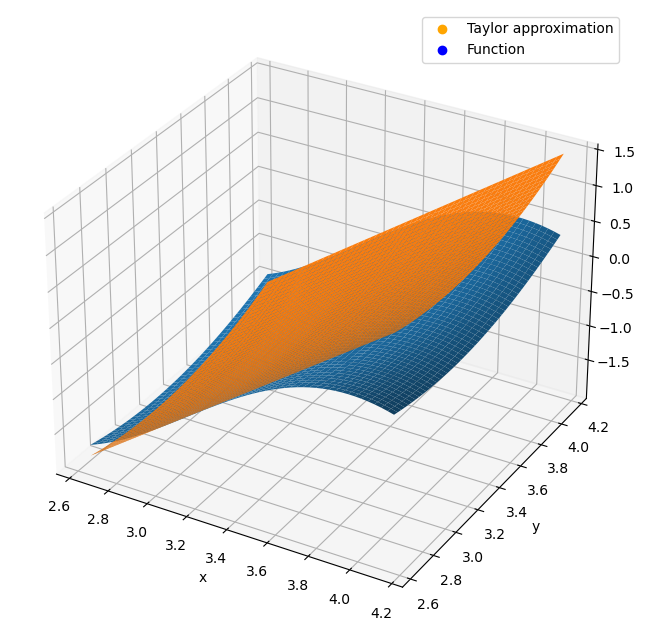

In [9]:
x_3d = np.linspace(np.pi - 0.5, np.pi + 1)
y_3d = np.linspace(np.pi - 0.5, np.pi + 1)
grid_x, grid_y = np.meshgrid(x_3d, y_3d)

plt.figure(figsize=(8,8))
ax = plt.axes(projection = '3d')
ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), label='f(x)')
ax.plot_surface(grid_x, grid_y, taylor(grid_x, grid_y), label='Taylor approximation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fake2Dline_1 = mpl.lines.Line2D([0],[0], linestyle="none", c='orange', marker = 'o')
fake2Dline_2 = mpl.lines.Line2D([0],[1], linestyle="none", c='blue', marker = 'o')
ax.legend([fake2Dline_1,fake2Dline_2], ['Taylor approximation','Function'],numpoints = 1)
# ax.legend() unknown how to add legend to plot, also not by TA
# ax.view_init(180, -90)
plt.show()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.4:</b> Error analysis.

Use the following cell to calculate the absolute error between the analytical and Taylor approximation  as previously and plot the results.
</p>
</div>

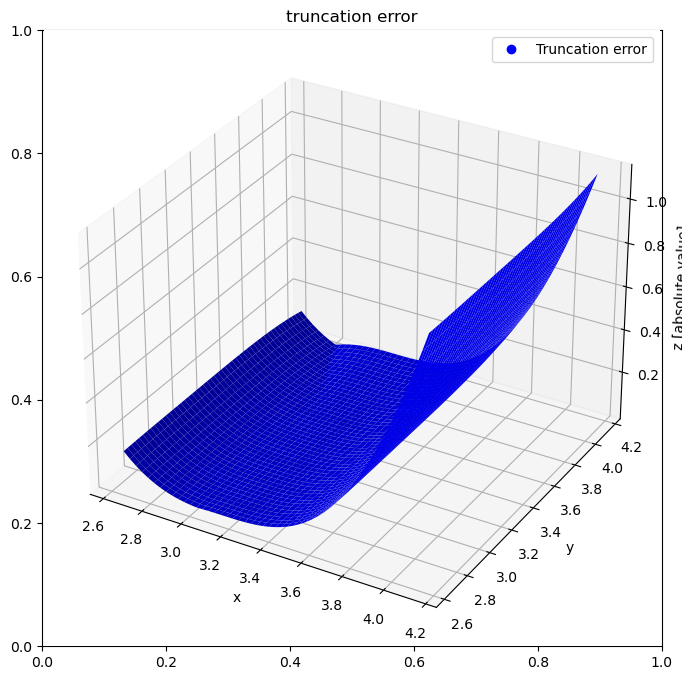

In [10]:
trunc_error = TERROR(f(grid_x, grid_y), taylor(grid_x, grid_y))
perc_error = PERROR(f(grid_x, grid_y), taylor(grid_x, grid_y))

plt.figure(figsize=(8,8))
plt.title('truncation error')

ax = plt.axes(projection = '3d')
ax.plot_surface(grid_x, grid_y, trunc_error, color='blue')

fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='blue', marker = 'o')
ax.legend([fake2Dline], ['Truncation error'], numpoints = 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z [absolute value]')


# plt.figure(figsize=(8,8))
# plt.title('percentage error')

# ax = plt.axes(projection = '3d')
# ax.plot_surface(grid_x, grid_y, perc_error, color='orange')

# fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='orange', marker = 'o')
# ax.legend([fake2Dline], ['Percentage error'], numpoints = 1)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z [percentage]')

# ax.view_init(180, -90)
plt.show()

